In [1]:
import pandas as pd
import numpy as np
import os
import sys
from bs4 import BeautifulSoup

In [2]:
DATA_PATH ='../TlkPersonaChatRus/'

In [3]:
dialogues = pd.read_csv(os.path.join(DATA_PATH, 'dialogues.tsv'), sep='\t')
profiles = pd.read_csv(os.path.join(DATA_PATH, 'profiles.tsv'), sep='\t')

In [4]:
mapper = {f'characteristic_{i}': f'characteristic_{i + 1}' for i in range(1,6)}
mapper['index'] = 'charateristic_1'
profiles = profiles.reset_index().rename(mapper, axis=1).drop(columns=['characteristic_6'])
# del mapper['index']

In [5]:
def preprocess_characteristic(value):
    value = value.lower().replace('.', '')
    if value.startswith('я '):
        value = value[2:]
    elif value.startswith('у меня '):
        value = value.replace('у меня ', '')
    return value


all_caracteristics = list()
for col in profiles.columns:
    all_caracteristics.extend(preprocess_characteristic(value) for value in profiles[col].values)
len(all_caracteristics), len(set(all_caracteristics))

(7525, 4335)

In [6]:
from collections import Counter
Counter(all_caracteristics).most_common()

[('люблю готовить', 67),
 ('люблю путешествовать', 61),
 ('есть собака', 56),
 ('двое детей', 43),
 ('люблю читать', 41),
 ('есть кот', 40),
 ('люблю животных', 38),
 ('студент', 36),
 ('домохозяйка', 36),
 ('хорошо готовлю', 34),
 ('учитель', 32),
 ('люблю детей', 30),
 ('люблю рыбалку', 27),
 ('играю на гитаре', 26),
 ('люблю кошек', 25),
 ('есть сын', 25),
 ('люблю рисовать', 25),
 ('студентка', 24),
 ('замужем', 24),
 ('трое детей', 23),
 ('есть кошка', 23),
 ('люблю собак', 22),
 ('много друзей', 21),
 ('люблю вышивать', 20),
 ('люблю петь', 19),
 ('врач', 19),
 ('инженер', 19),
 ('занимаюсь спортом', 19),
 ('есть попугай', 19),
 ('не женат', 18),
 ('люблю музыку', 18),
 ('люблю спорт', 18),
 ('бухгалтер', 17),
 ('люблю море', 17),
 ('программист', 16),
 ('женат', 16),
 ('люблю плавать', 16),
 ('люблю гулять', 16),
 ('мужчина', 15),
 ('строитель', 15),
 ('есть дочь', 15),
 ('люблю свою работу', 15),
 ('есть брат', 15),
 ('много читаю', 15),
 ('женщина', 14),
 ('учусь в школе', 14)

In [10]:
import pickle

with open(os.path.join(DATA_PATH, 'all_characteristics.pkl'), 'wb') as f:
    pickle.dump(dict(Counter(all_caracteristics).most_common()), f)

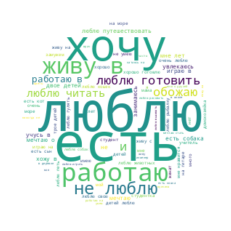

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = "square"

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(background_color="white", repeat=True, mask=mask, random_state=2029)
wc.generate(' '.join(all_caracteristics))

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [76]:
dialogues.sample(4)

,persona_1_profile,persona_2_profile,dialogue
2438,<span class=participant_1>я слесарь<br />я люб...,<span class=participant_2>Я селекционер<br />С...,"""<span class=participant_1>Пользователь 1: При..."
9368,<span class=participant_1>Я бухгалтер<br />Я с...,<span class=participant_2>Я студент<br />Работ...,<span class=participant_2>Пользователь 2: По в...
3075,<span class=participant_1>Учусь в 10 классе.<b...,<span class=participant_2>Я студентка.<br />Я ...,<span class=participant_2>Пользователь 2: Прив...
4513,<span class=participant_1>люблю поп музыку<br ...,<span class=participant_2>Я хороший друг<br />...,"""<span class=participant_1>Пользователь 1: При..."


In [144]:
def process_profile(value):
    txt = str(BeautifulSoup(value, 'html.parser')).split('<br/>')[:5]
    txt[0] = txt[0][28:]
    return [preprocess_characteristic(val) for val in txt]

In [156]:
new_dialogues = dialogues.copy()
prof_1_list = [f'persona_1_profile_{i}' for i in range(1,6)]
prof_2_list = [f'persona_2_profile_{i}' for i in range(1,6)]
new_dialogues[prof_1_list] = pd.DataFrame(dialogues['persona_1_profile'].apply(process_profile).to_list(),
                                          columns=prof_1_list)
new_dialogues[prof_2_list] = pd.DataFrame(dialogues['persona_2_profile'].apply(process_profile).to_list(),
                                          columns=prof_2_list)
new_dialogues.drop(columns=['persona_1_profile', 'persona_2_profile'])

,dialogue,persona_1_profile_1,persona_1_profile_2,persona_1_profile_3,persona_1_profile_4,persona_1_profile_5,persona_2_profile_1,persona_2_profile_2,persona_2_profile_3,persona_2_profile_4,persona_2_profile_5
0,<span class=participant_2>Пользователь 2: Прив...,любимая работа,уважаю людей,есть животное,хороший друг,люблю кофе,ищу принца,веду активный образ жизни,люблю читать классику,выращиваю фиалки,люблю общение
1,<span class=participant_1>Пользователь 1: Прив...,работаю учителем,есть собака,люблю петь,живу сама,люблю цветы,бизнесмен,скоро свадьба,меня любят только за деньги,не люблю людей,не люблю тупые опросы
2,<span class=participant_1>Пользователь 1: Прив...,купила дом,бегаю по утрам,работаю на работе,поеду в отпуск,люблю арбуз,пою в караоке,есть супруга,хорошо готовлю пасту,люблю собак,аллергия на кошек
3,<span class=participant_2>Пользователь 2: Здра...,врач и женат,трое детей,не люблю свою работу,нравиться ездить на велосипеде,люблю пиво,мальчик,учусь в 6-ом классе,хочу стать гонщиком,есть сестра,мечтаю о машине
4,<span class=participant_1>Пользователь 1: Прив...,школьница,ещё учусь,но я мечтаю работать,обожаю родителей,и не люблю учиться,простоват,люди избегают меня,быстро бегаю,мои увлечения неординарны,работаю по призванию
...,...,...,...,...,...,...,...,...,...,...,...
10008,"""<span class=participant_1>Пользователь 1: При...",6 собак,не люблю кошек,работаю кинологом,люблю музыку,не люблю гулять,музыкант,люблю веселые компании,увлекаюсь охотой,люблю мотоциклы,люблю собирать грибы
10009,<span class=participant_1>Пользователь 1: Прив...,верная,мне нравится уют,люблю посиделки у камина,мое хобби вязание,не люблю дождь,люблю рок,пишу статьи для журнала,езжу на велосипеде,хочу купить собаку,не люблю морковку
10010,<span class=participant_1>Пользователь 1: Прив...,студент,учусь на хирурга,очень люблю комедии,люблю машины,есть золотая рыбка,директор турфирмы,люблю детей,катаюсь на сноуборде,люблю звонить по ночам,хочу покорить эверест
10011,<span class=participant_1>Пользователь 1: Прив...,моя мама живет со мной,люблю есть пироги,есть хаски,часто болею,рисую животных,воспитатель,люблю готовить,люблю велоспорт,увлекаюсь магией,есть черная кошка


In [157]:
new_dialogues.to_csv(os.path.join(DATA_PATH, 'new_dialogues.tsv'), sep='\t')

In [11]:
new_dialogues = pd.read_csv(os.path.join(DATA_PATH, 'new_dialogues.tsv'), sep='\t', index_col=0)
new_dialogues

,dialogue,persona_1_profile_1,persona_1_profile_2,persona_1_profile_3,persona_1_profile_4,persona_1_profile_5,persona_2_profile_1,persona_2_profile_2,persona_2_profile_3,persona_2_profile_4,persona_2_profile_5
0,<span class=participant_2>Пользователь 2: Прив...,любимая работа,уважаю людей,есть животное,хороший друг,люблю кофе,ищу принца,веду активный образ жизни,люблю читать классику,выращиваю фиалки,люблю общение
1,<span class=participant_1>Пользователь 1: Прив...,работаю учителем,есть собака,люблю петь,живу сама,люблю цветы,бизнесмен,скоро свадьба,меня любят только за деньги,не люблю людей,не люблю тупые опросы
2,<span class=participant_1>Пользователь 1: Прив...,купила дом,бегаю по утрам,работаю на работе,поеду в отпуск,люблю арбуз,пою в караоке,есть супруга,хорошо готовлю пасту,люблю собак,аллергия на кошек
3,<span class=participant_2>Пользователь 2: Здра...,врач и женат,трое детей,не люблю свою работу,нравиться ездить на велосипеде,люблю пиво,мальчик,учусь в 6-ом классе,хочу стать гонщиком,есть сестра,мечтаю о машине
4,<span class=participant_1>Пользователь 1: Прив...,школьница,ещё учусь,но я мечтаю работать,обожаю родителей,и не люблю учиться,простоват,люди избегают меня,быстро бегаю,мои увлечения неординарны,работаю по призванию
...,...,...,...,...,...,...,...,...,...,...,...
10008,"""<span class=participant_1>Пользователь 1: При...",6 собак,не люблю кошек,работаю кинологом,люблю музыку,не люблю гулять,музыкант,люблю веселые компании,увлекаюсь охотой,люблю мотоциклы,люблю собирать грибы
10009,<span class=participant_1>Пользователь 1: Прив...,верная,мне нравится уют,люблю посиделки у камина,мое хобби вязание,не люблю дождь,люблю рок,пишу статьи для журнала,езжу на велосипеде,хочу купить собаку,не люблю морковку
10010,<span class=participant_1>Пользователь 1: Прив...,студент,учусь на хирурга,очень люблю комедии,люблю машины,есть золотая рыбка,директор турфирмы,люблю детей,катаюсь на сноуборде,люблю звонить по ночам,хочу покорить эверест
10011,<span class=participant_1>Пользователь 1: Прив...,моя мама живет со мной,люблю есть пироги,есть хаски,часто болею,рисую животных,воспитатель,люблю готовить,люблю велоспорт,увлекаюсь магией,есть черная кошка
